이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 0.6131 - accuracy: 0.8128 - val_loss: 0.3282 - val_accuracy: 0.8984
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2433 - accuracy: 0.9243 - val_loss: 0.2150 - val_accuracy: 0.9346
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1586 - accuracy: 0.9513 - val_loss: 0.1745 - val_accuracy: 0.9510
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1150 - accuracy: 0.9638 - val_loss: 0.1363 - val_accuracy: 0.9581
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0823 - accuracy: 0.9743 - val_loss: 0.1341 - val_accuracy: 0.9607
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.1170 - val_accuracy: 0.9669
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.1313 - val_accuracy: 0.9647
Epoch 

**검증 정확도 비교 그래프 그리기**

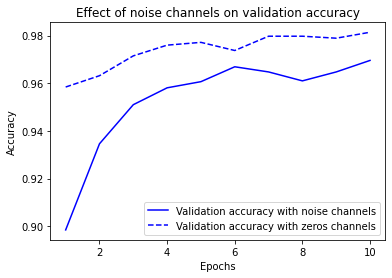

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3186 - accuracy: 0.1031 - val_loss: 2.3072 - val_accuracy: 0.1043
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2998 - accuracy: 0.1152 - val_loss: 2.3135 - val_accuracy: 0.1005
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2899 - accuracy: 0.1271 - val_loss: 2.3189 - val_accuracy: 0.1002
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2763 - accuracy: 0.1399 - val_loss: 2.3280 - val_accuracy: 0.1031
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2591 - accuracy: 0.1542 - val_loss: 2.3431 - val_accuracy: 0.0995
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2381 - accuracy: 0.1685 - val_loss: 2.3538 - val_accuracy: 0.1006
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2124 - accuracy: 0.1839 - val_loss: 2.3768 - val_accuracy: 0.1002

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1072.8800 - accuracy: 0.4609 - val_loss: 8.7493 - val_accuracy: 0.3795
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.0622 - accuracy: 0.3121 - val_loss: 2.1783 - val_accuracy: 0.3994
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 4.2331 - accuracy: 0.3183 - val_loss: 2.0610 - val_accuracy: 0.3086
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.9689 - accuracy: 0.3133 - val_loss: 4.8494 - val_accuracy: 0.3406
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5279 - accuracy: 0.2779 - val_loss: 2.1086 - val_accuracy: 0.2690
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6724 - accuracy: 0.3167 - val_loss: 2.4861 - val_accuracy: 0.3088
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.6682 - accuracy: 0.2937 - val_loss: 2.5677 - val_accuracy: 0.3142
Epo

**같은 모델을 적절한 학습률로 훈련하기**

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3588 - accuracy: 0.9128 - val_loss: 0.2375 - val_accuracy: 0.9398
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1431 - accuracy: 0.9638 - val_loss: 0.1824 - val_accuracy: 0.9566
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1178 - accuracy: 0.9721 - val_loss: 0.1684 - val_accuracy: 0.9709
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0987 - accuracy: 0.9786 - val_loss: 0.1908 - val_accuracy: 0.9693
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9819 - val_loss: 0.2492 - val_accuracy: 0.9664
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.9835 - val_loss: 0.2023 - val_accuracy: 0.9728
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0713 - accuracy: 0.9859 - val_loss: 0.2328 - val_accuracy: 0.9728
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6689 - accuracy: 0.8348 - val_loss: 0.3602 - val_accuracy: 0.9028
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3514 - accuracy: 0.9035 - val_loss: 0.3079 - val_accuracy: 0.9149
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3153 - accuracy: 0.9124 - val_loss: 0.2902 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2990 - accuracy: 0.9168 - val_loss: 0.2811 - val_accuracy: 0.9221
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2896 - accuracy: 0.9187 - val_loss: 0.2752 - val_accuracy: 0.9232
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9209 - val_loss: 0.2722 - val_accuracy: 0.9245
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.9222 - val_loss: 0.2692 - val_accuracy: 0.9254
Epoch 

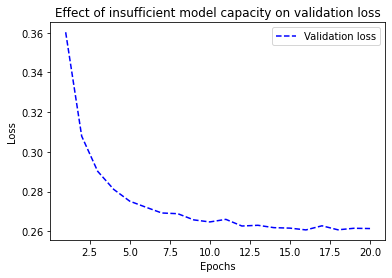

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3696 - accuracy: 0.8978 - val_loss: 0.2014 - val_accuracy: 0.9406
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1610 - accuracy: 0.9518 - val_loss: 0.1392 - val_accuracy: 0.9598
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1113 - accuracy: 0.9665 - val_loss: 0.1105 - val_accuracy: 0.9683
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9740 - val_loss: 0.0984 - val_accuracy: 0.9702
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0969 - val_accuracy: 0.9709
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0562 - accuracy: 0.9827 - val_loss: 0.0968 - val_accuracy: 0.9732
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.0923 - val_accuracy: 0.9727
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5118 - accuracy: 0.7942 - val_loss: 0.3966 - val_accuracy: 0.8645
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3088 - accuracy: 0.9041 - val_loss: 0.3057 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2241 - accuracy: 0.9275 - val_loss: 0.2775 - val_accuracy: 0.8937
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1776 - accuracy: 0.9411 - val_loss: 0.2884 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1439 - accuracy: 0.9547 - val_loss: 0.2798 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1197 - accuracy: 0.9633 - val_loss: 0.2933 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1027 - accurac

**작은 용량의 모델**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5793 - accuracy: 0.7719 - val_loss: 0.4977 - val_accuracy: 0.8150
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4241 - accuracy: 0.8781 - val_loss: 0.4017 - val_accuracy: 0.8668
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3374 - accuracy: 0.9001 - val_loss: 0.3441 - val_accuracy: 0.8817
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2784 - accuracy: 0.9167 - val_loss: 0.3107 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2377 - accuracy: 0.9285 - val_loss: 0.2951 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2075 - accuracy: 0.9373 - val_loss: 0.2814 - val_accuracy: 0.8924
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1825 - accuracy: 0.9467 - val_loss: 0.2786 - val_accuracy: 0.8889
Epoch 8/20
30

**큰 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5673 - accuracy: 0.7789 - val_loss: 0.3003 - val_accuracy: 0.8852
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2481 - accuracy: 0.9052 - val_loss: 0.3609 - val_accuracy: 0.8541
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1528 - accuracy: 0.9397 - val_loss: 0.3480 - val_accuracy: 0.8729
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1118 - accuracy: 0.9672 - val_loss: 0.3435 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 1.6897 - val_accuracy: 0.6846
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.5067 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 8.4210e-04 - accuracy: 0.9999 - val_loss: 0.6132 - val_accuracy: 0.8886
Epoch 8/2

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.6008 - accuracy: 0.7869 - val_loss: 0.5094 - val_accuracy: 0.8202
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4126 - accuracy: 0.8913 - val_loss: 0.4147 - val_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3432 - accuracy: 0.9120 - val_loss: 0.3858 - val_accuracy: 0.8798
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3126 - accuracy: 0.9197 - val_loss: 0.3618 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2898 - accuracy: 0.9306 - val_loss: 0.3603 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2761 - accuracy: 0.9340 - val_loss: 0.4112 - val_accuracy: 0.8648
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2647 - accuracy: 0.9390 - val_loss: 0.3612 - val_accuracy: 0.8852
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6394 - accuracy: 0.6262 - val_loss: 0.5249 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5247 - accuracy: 0.7531 - val_loss: 0.4134 - val_accuracy: 0.8722
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4367 - accuracy: 0.8188 - val_loss: 0.3441 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3715 - accuracy: 0.8570 - val_loss: 0.3002 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3236 - accuracy: 0.8821 - val_loss: 0.2817 - val_accuracy: 0.8929
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2814 - accuracy: 0.8973 - val_loss: 0.2889 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2499 - accuracy: 0.9121 - val_loss: 0.2747 - val_accuracy: 0.8940
Epoch 8/20
30

## 요약